In [6]:
import dlib, cv2, os, boto3, awscli
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'dlib'

In [3]:
s3 = boto3.resource('s3')
for bucket in s3.buckets.all():
    print(bucket.name)

NameError: name 'boto3' is not defined

# Load Models

In [4]:
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat')
predictor = dlib.shape_predictor('landmarkDetector.dat')

NameError: name 'dlib' is not defined

# Load Dog Image

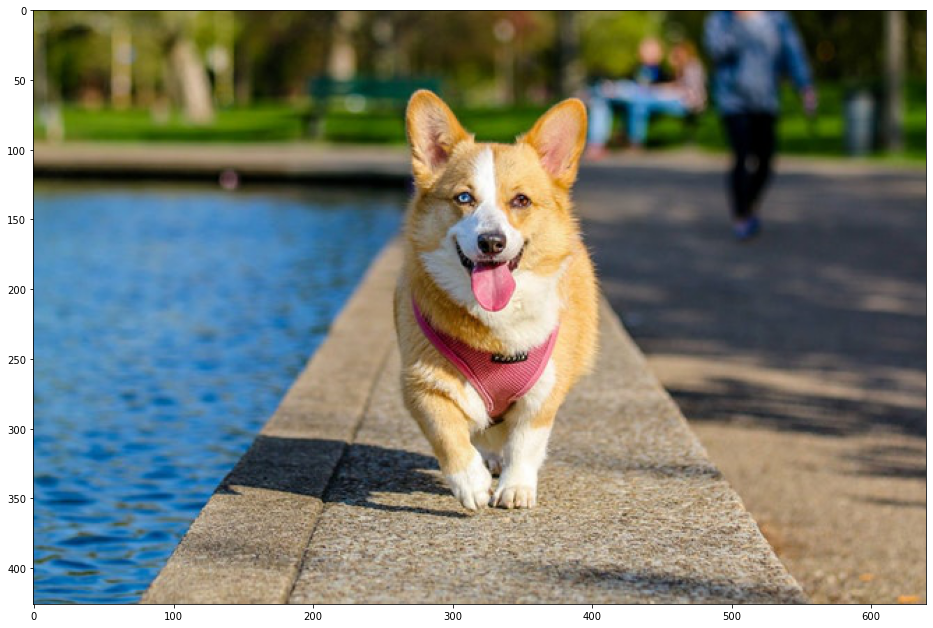

In [16]:
# 강아지 이미지 로드
img_path = 'img/05.jpg'
filename, ext = os.path.splitext(os.path.basename(img_path))
# openCv 이미지 읽기
img = cv2.imread(img_path)
# openCv 컬러변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, dsize=None, fx=0.5, fy=0.5)

plt.figure(figsize=(16, 16))
plt.imshow(img)

# Detect Faces

Detection 0: Left: 273 Top: 101 Right: 371 Bottom: 199 Confidence: 1.036125898361206


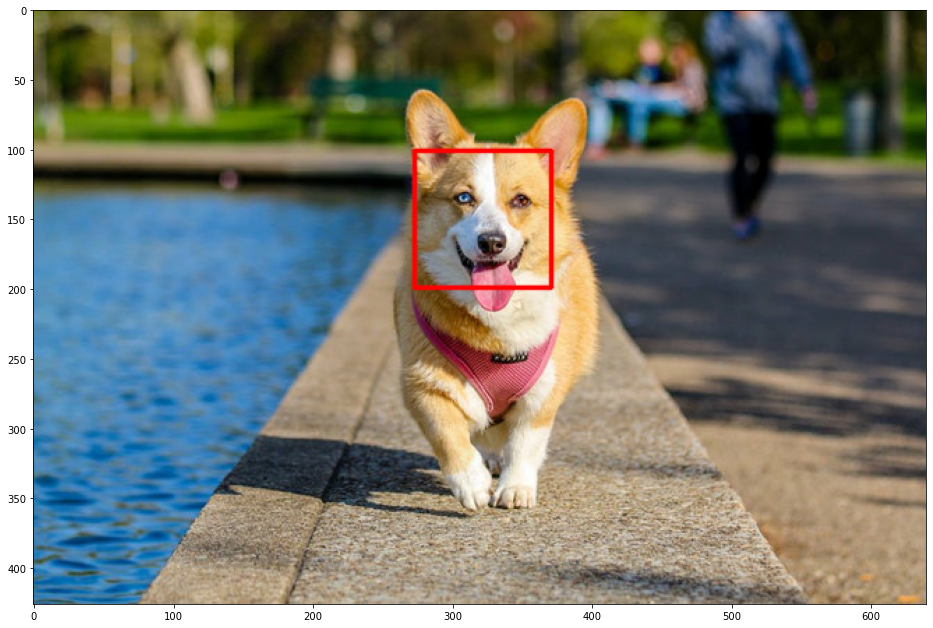

In [17]:
# 강아지 얼굴 인식
dets = detector(img, upsample_num_times=1)

print(dets)

img_result = img.copy()

# 반복문 사용해서 네모난 틀 만들기
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()

    cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
    
plt.figure(figsize=(16, 16))
plt.imshow(img_result)